In [1]:
from math import sin, cos, log, pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#initial conditions
m_s = 50.0
g = 9.81 
p = 1.091
A = 0.5*0.5*pi
v_e = 325.0
C_d = 0.15
m_p0 = 100.0

In [3]:
T = 40
dt = 0.02
N = int(T/dt) + 1
t = numpy.linspace(0.0, T, N)

In [4]:
def m_pdot(t):
    if t <= 5.0:
        return 20.0
    else:
        return 0.0

In [5]:
m_p = numpy.zeros(N)
for n in range(N):
    if n <= 5/dt:
        m_p[n] = 100.0 - m_pdot(n*dt)*n*dt

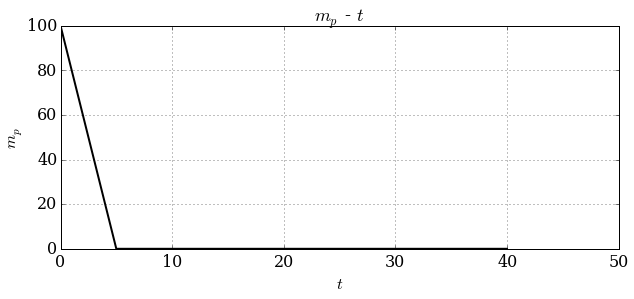

In [6]:
pyplot.figure(figsize=(10,4))
pyplot.grid(True)
pyplot.xlabel('$t$')
pyplot.ylabel('$m_p$')
pyplot.xlim(0, 50)
pyplot.title('$m_p$ - $t$', fontsize = 18)
pyplot.plot(t, m_p, 'k-', lw=2)

In [7]:
print(m_p[int(3.2/dt)])

36.0


In [8]:
v0 = 0
h0 = 0
def f(u):
    v = u[1]
    h = u[0]
    return numpy.array([v,-g + (1/(m_s + m_p1)*m_rate*v_e\
                                -0.5*1/(m_s+m_p1)*p*v*numpy.abs(v)*A*C_d)])

In [9]:
def euler_step(u, f, dt):
    return u + dt*f(u)

In [10]:
u = numpy.empty((N, 2))
u[0] = numpy.array([h0, v0])

m_prate = numpy.zeros(N)
for i in range(N):
    m_prate[i] = m_pdot(i*dt)
for n in range(N-1):  
    m_p1 = m_p[n]
    m_rate = m_prate[n]
    u[n+1] = euler_step(u[n], f, dt)

In [11]:
h = u[:, 0]
v = u[:, 1]

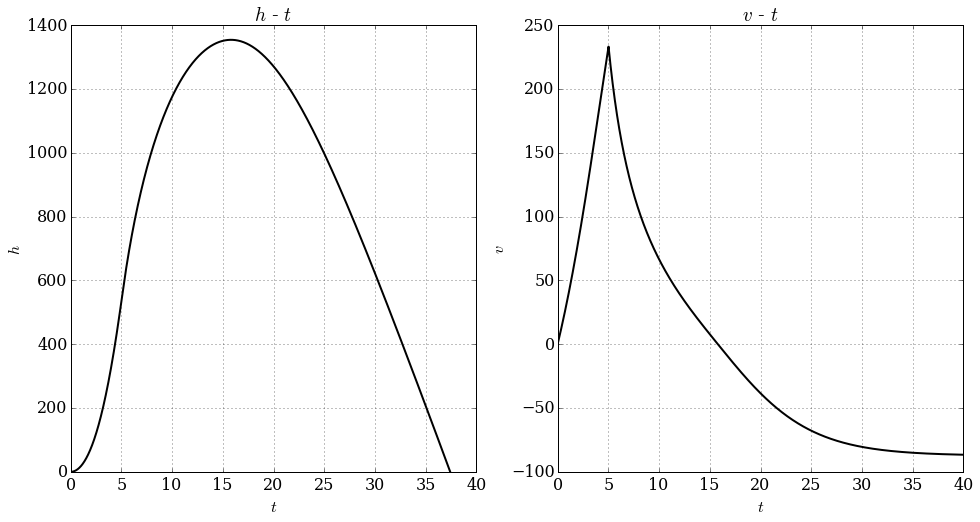

In [12]:
pyplot.figure(figsize=(16,8))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$t$')
pyplot.ylabel('$h$')
pyplot.ylim(0,1400)
pyplot.plot(t, h, 'k-', lw=2)
pyplot.title('$h$ - $t$')

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$t$')
pyplot.ylabel('$v$')
pyplot.plot(t, v, 'k-', lw=2)
pyplot.title('$v$ - $t$');


In [13]:
print(u[20,1])

13.8539084621


In [14]:
print ('The maximum speed is v = {:.2f} m/s'.format(u[int(5/dt),1]),'occurs at t = 5 s','and the altitude is h = {:.2f} m'\
       .format(u[int(5/dt),0]))

The maximum speed is v = 232.38 m/s occurs at t = 5 s and the altitude is h = 534.84 m


In [15]:
for n in range(N):
    if u[n,1] < 0:
        print ('The maximum altitude is h = {:.2f} m'.format(u[n, 0]),'occurs at t={}s'. format(n*dt))
        break

The maximum altitude is h = 1354.80 m occurs at t=15.8s


In [16]:
for n in range (1,N):
    if u[n,0] < 0:
        print ('The rocket will impact the ground at t = {} s'.format(n*dt), 'and the velocity is v={:.2f} m/s'. format(u[n,1]))
        break

The rocket will impact the ground at t = 37.42 s and the velocity is v=-86.02 m/s
